In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df = pd.read_csv(
    Path("../Data/Feature_Engineering.RY.csv"), 
    index_col="Date"
)

# Review the DataFrame
display(df.head())
display(df.columns)

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

In [3]:
df_plt1 = df[['High','Low', 'Mid_hl']].loc['2018-04-01':'2018-04-30']
df_plt1 = df_plt1.reset_index()
df_plt1 = df_plt1.drop(columns = ['Date'])
df_plt1.columns

Index(['High', 'Low', 'Mid_hl'], dtype='object')

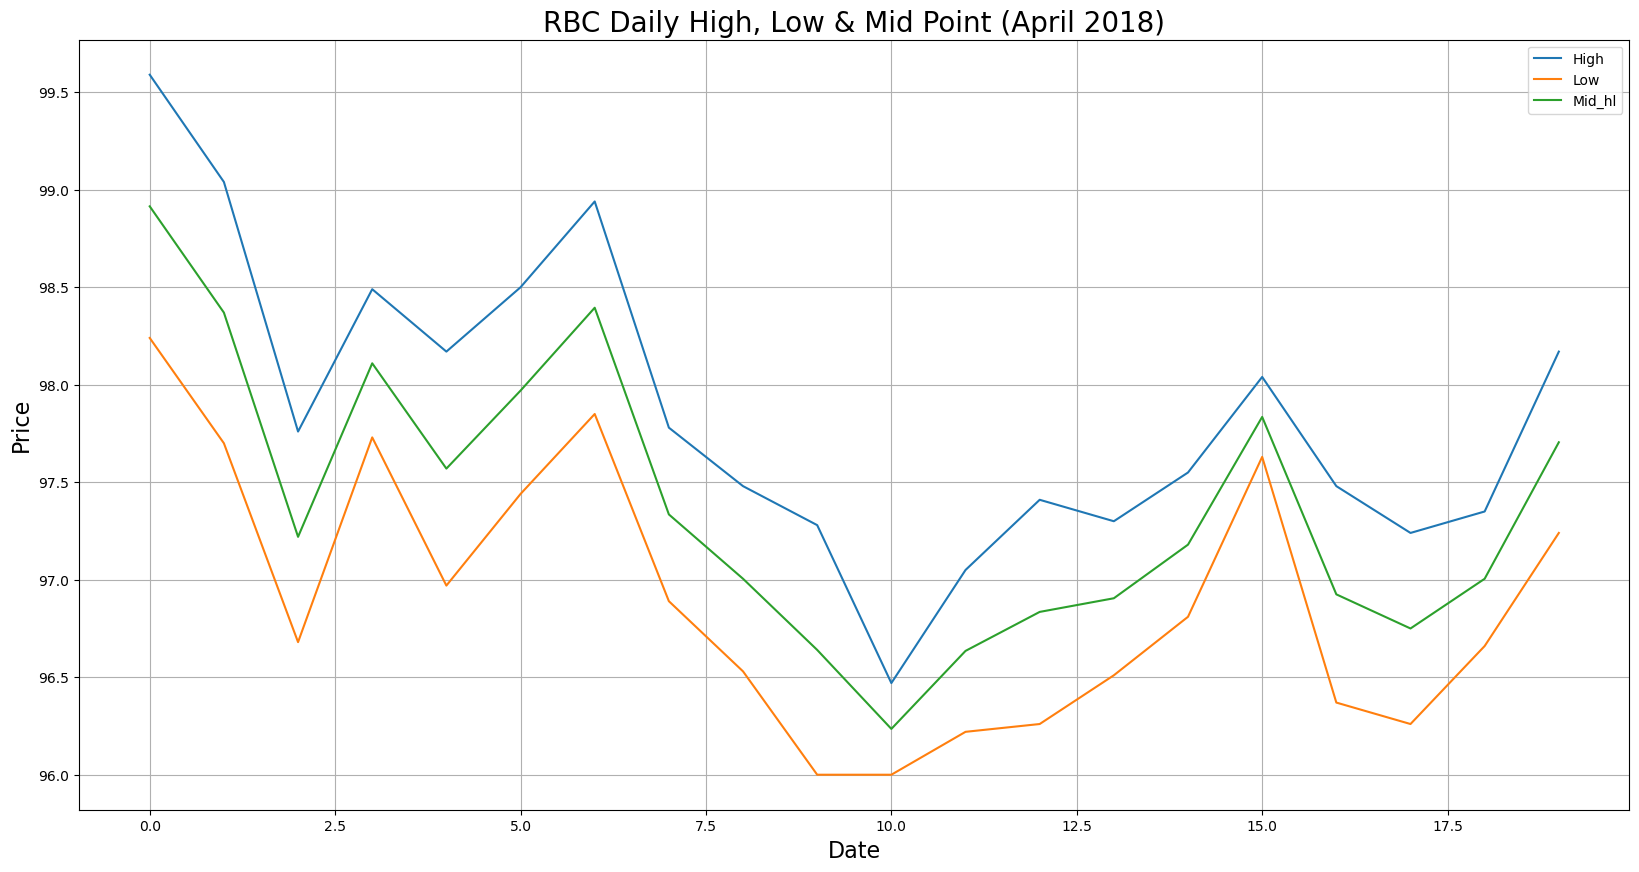

In [10]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_plt1[['High', 'Low', 'Mid_hl' ]])
plt.title("RBC Daily High, Low & Mid Point (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt1.columns)
plt.grid()

plt.show()


In [5]:
df_plt2 = df[['Open', 'Mid_oc', 'Close']].loc['2018-04-01':'2018-04-30']
df_plt2 = df_plt2.reset_index()
df_plt2 = df_plt2.drop(columns = ['Date'])
df_plt2.columns

Index(['Open', 'Mid_oc', 'Close'], dtype='object')

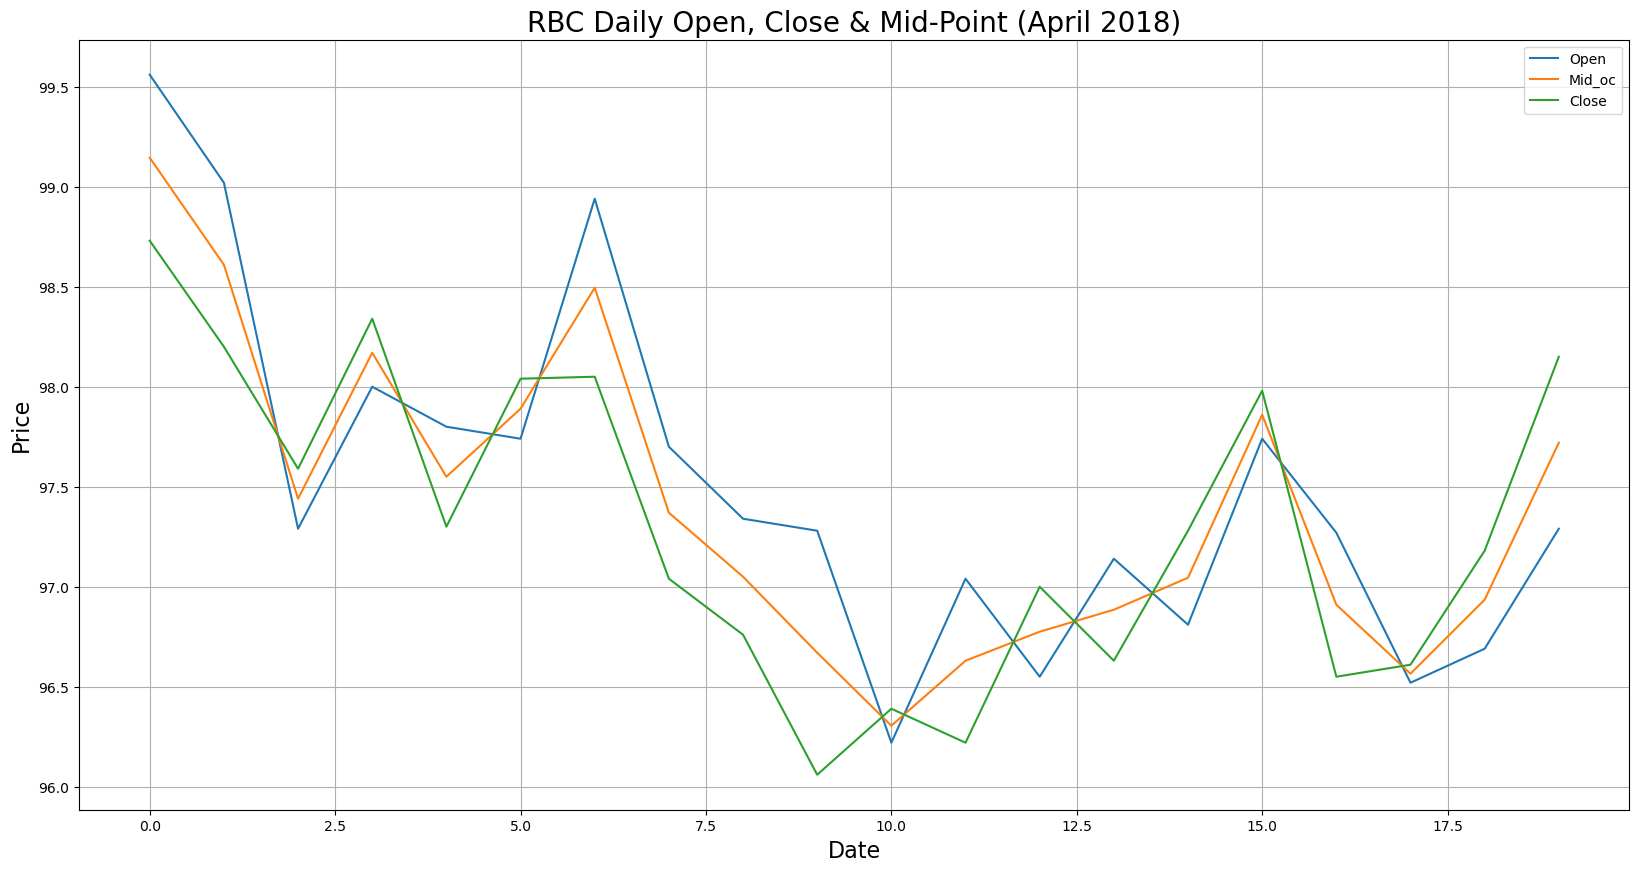

In [6]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_plt2[['Open', 'Mid_oc', 'Close']])
plt.title("RBC Daily Open, Close & Mid-Point (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt2.columns)
plt.grid()

plt.show()


In [7]:
df_plt3 = df[['high_slope', 'mid_oc_slope', 'low_slope']].loc['2018-04-01':'2018-04-30']
df_plt3 = df_plt3.reset_index()
df_plt3 = df_plt3.drop(columns = ['Date'])
df_plt3.columns

Index(['high_slope', 'mid_oc_slope', 'low_slope'], dtype='object')

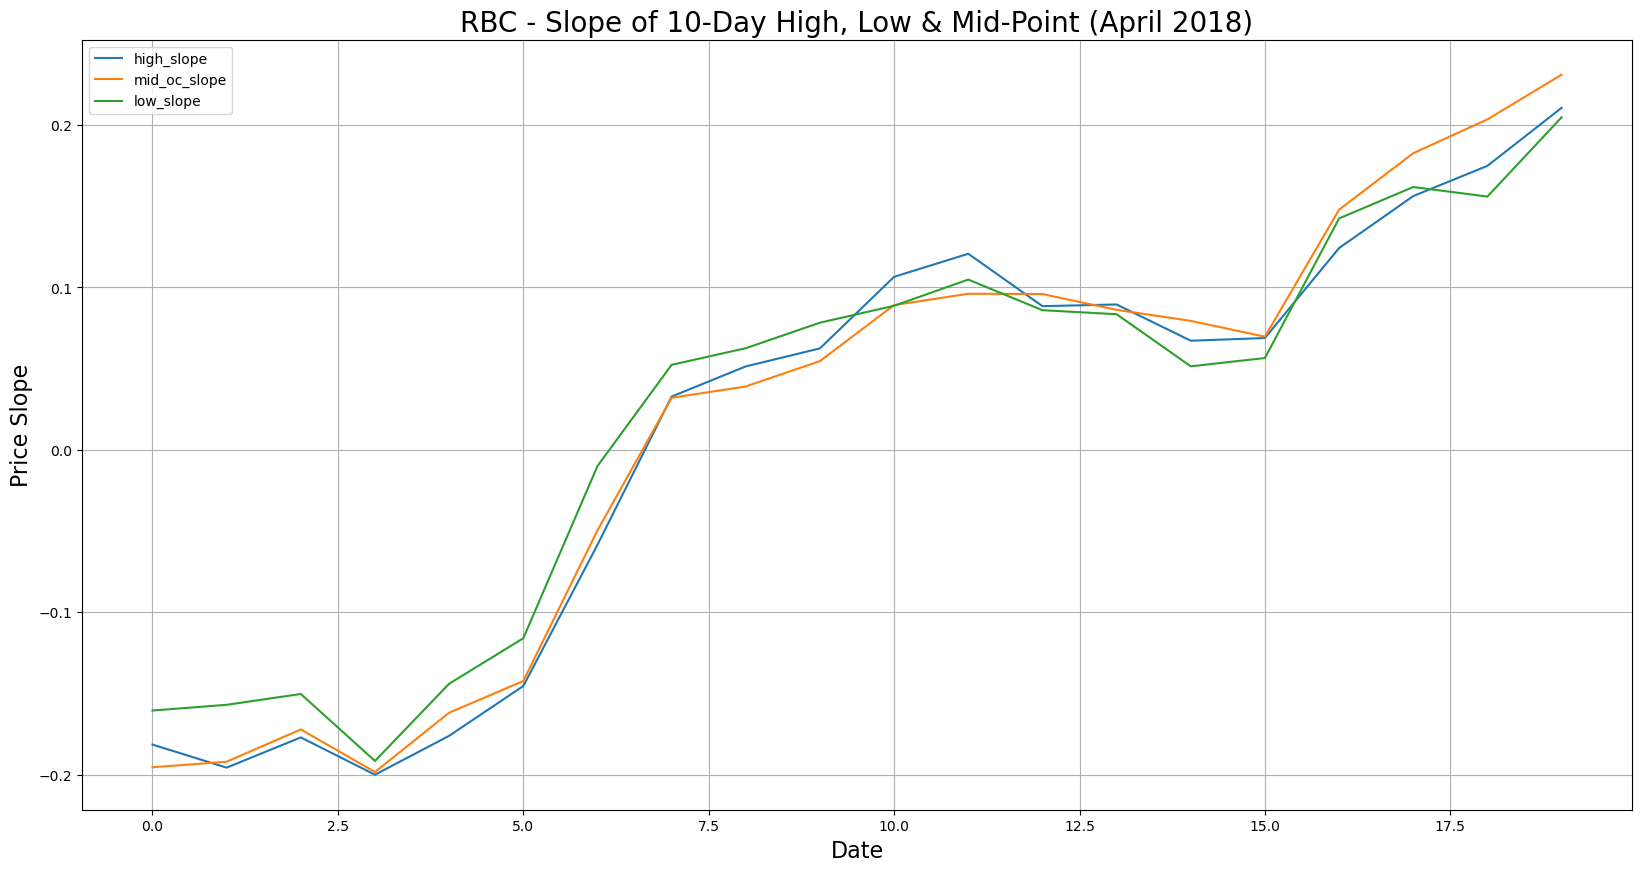

In [8]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_plt3[['high_slope', 'mid_oc_slope', 'low_slope']])
plt.title("RBC - Slope of 10-Day High, Low & Mid-Point (April 2018)", fontsize = 20)
plt.ylabel("Price Slope", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt3.columns)
plt.grid()

plt.show()

In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

In [32]:
df_plt4 = df[['Mid_oc', 'mid_oc_slope', 'mid_oc_intercept']].loc['2018-04-01':'2018-04-30']
df_plt4 = df_plt4.reset_index()
df_plt4 = df_plt4.drop(columns = ['Date'])
df_plt4['Predict_5'] = (df_plt4['mid_oc_slope'].iloc[5] * (df_plt4.index - 4 )) + df_plt4['mid_oc_intercept'].iloc[5]
df_plt4['Predict_6'] = (df_plt4['mid_oc_slope'].iloc[6] * (df_plt4.index - 5 )) + df_plt4['mid_oc_intercept'].iloc[6]
df_plt4['Predict_7'] = (df_plt4['mid_oc_slope'].iloc[7] * (df_plt4.index - 6 )) + df_plt4['mid_oc_intercept'].iloc[7]
df_plt4['Predict_8'] = (df_plt4['mid_oc_slope'].iloc[8] * (df_plt4.index - 7 )) + df_plt4['mid_oc_intercept'].iloc[8]
df_plt4 = df_plt4.drop(columns = ['mid_oc_slope', 'mid_oc_intercept'])
df_plt4

,Mid_oc,Predict_5,Predict_6,Predict_7,Predict_8
0,99.145000,98.463092,97.628728,96.581302,96.381242
1,98.609997,98.320819,97.579183,96.613362,96.420303
2,97.439999,98.178546,97.529637,96.645423,96.459363
3,98.169998,98.036273,97.480092,96.677484,96.498424
4,97.550003,97.894000,97.430546,96.709545,96.537485
5,97.889999,97.751728,97.381001,96.741605,96.576545
6,98.495003,97.609455,97.331455,96.773666,96.615606
7,97.369999,97.467182,97.281909,96.805727,96.654666
8,97.049999,97.324909,97.232364,96.837787,96.693727
9,96.669998,97.182636,97.182818,96.869848,96.732788


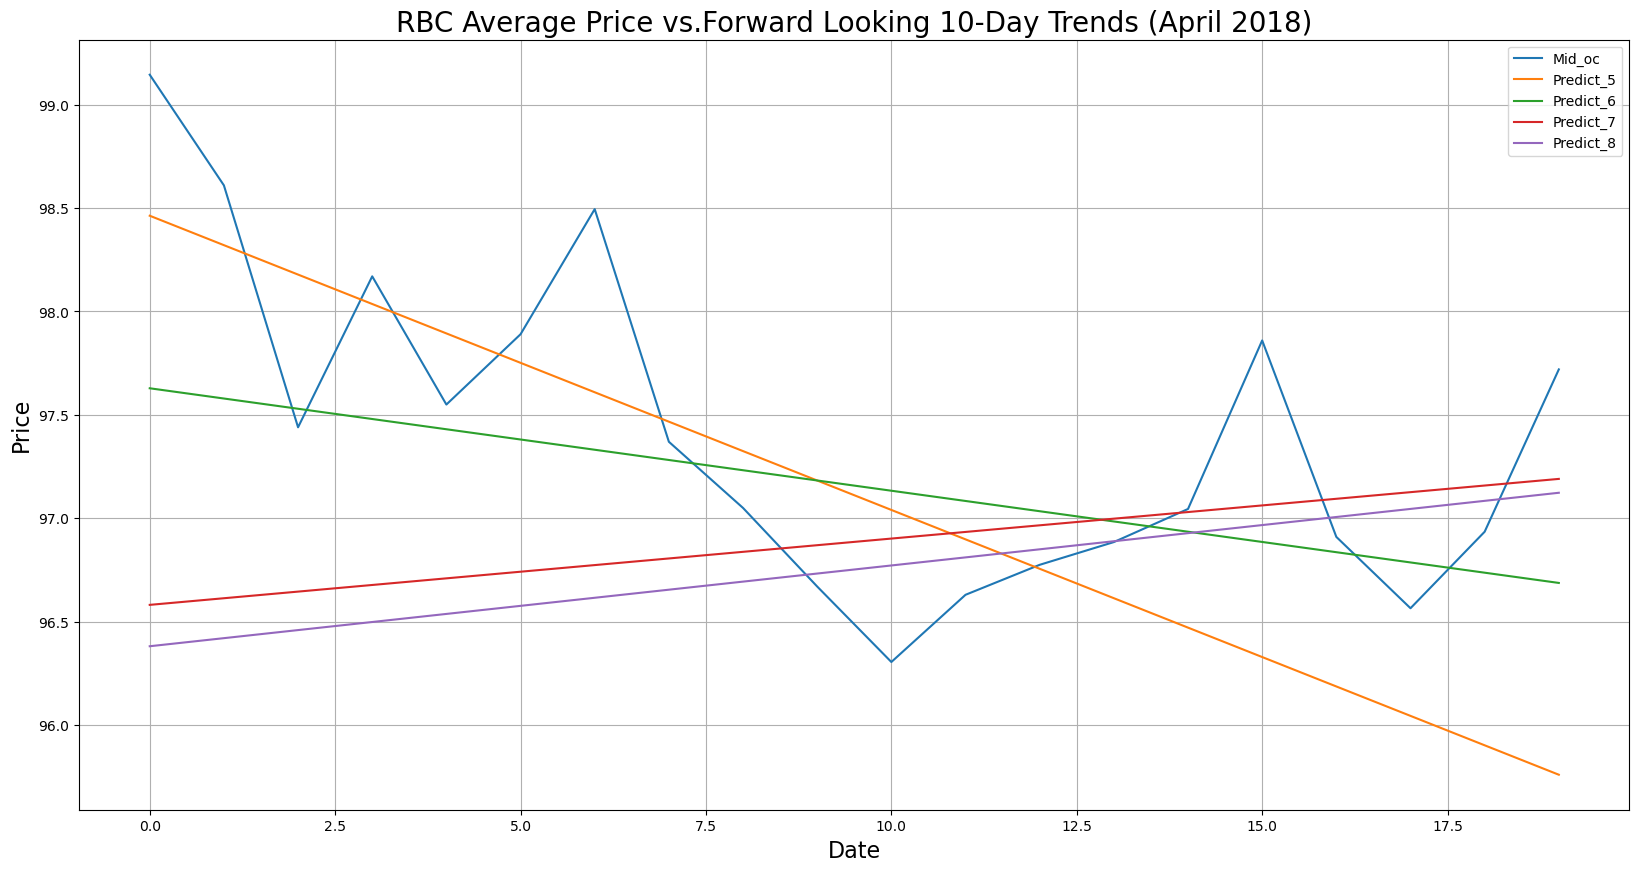

In [35]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_plt4[['Mid_oc', 'Predict_5','Predict_6', 'Predict_7','Predict_8']])
plt.title("RBC Average Price vs.Forward Looking 10-Day Trends (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt4.columns)
plt.grid()

plt.show()
